In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates

In [ ]:
# MERGE1:HEART DATA FILE AND FLOOR DATA FILE

In [2]:
heart_data=pd.read_csv('C:\\Users\\user\\Desktop\\python project\\sumitha\\heart_rate.csv',parse_dates=['update_time'])

In [3]:
floors_data=pd.read_csv('C:\\Users\\user\\Desktop\\python project\\sumitha\\floors_climbed.csv',parse_dates=['update_time'])

In [4]:
heart_data.columns

Index(['Unnamed: 0', 'end_time', 'heart_rate', 'binning_data', 'start_time',
       'heart_beat_count', 'update_time', 'max', 'min', 'pkg_name',
       'time_offset', 'datauuid', 'create_time'],
      dtype='object')

In [5]:
floors_data.columns

Index(['Unnamed: 0', 'end_time', 'pkg_name', 'time_offset', 'start_time',
       'floor', 'datauuid', 'update_time', 'create_time'],
      dtype='object')

In [6]:
merged_inner=pd.merge(left=heart_data,right=floors_data,left_on='time_offset',right_on="time_offset")

In [7]:
merged_inner.shape

(77278, 21)

In [10]:
merged_inner.head(5)

,Unnamed: 0_x,end_time_x,heart_rate,binning_data,start_time_x,heart_beat_count,update_time_x,max,min,pkg_name_x,...,datauuid_x,create_time_x,Unnamed: 0_y,end_time_y,pkg_name_y,start_time_y,floor,datauuid_y,update_time_y,create_time_y
0,0,2017-12-16 04:30:29.450,60.0,NaN,2017-12-16 04:30:29.450,1,2017-12-16 04:35:00.341,0.0,0.0,com.sec.android.app.shealth,...,00978ee8-6b03-16cb-7bba-d22949a728cb,2017-12-16 04:35:00.341,0,2018-01-24 21:30:56.000,com.sec.android.app.shealth,2018-01-24 21:29:51.000,2.0,00443274-6e30-97f9-3eb2-75d17f3e766f,2018-01-24 21:34:47.756,2018-01-24 21:34:47.720
1,0,2017-12-16 04:30:29.450,60.0,NaN,2017-12-16 04:30:29.450,1,2017-12-16 04:35:00.341,0.0,0.0,com.sec.android.app.shealth,...,00978ee8-6b03-16cb-7bba-d22949a728cb,2017-12-16 04:35:00.341,2,2018-02-12 07:40:16.000,com.sec.android.app.shealth,2018-02-12 07:38:21.000,2.0,012ee314-b5de-8ac7-0421-c634e858ebc4,2018-02-12 07:41:27.854,2018-02-12 07:41:27.802
2,0,2017-12-16 04:30:29.450,60.0,NaN,2017-12-16 04:30:29.450,1,2017-12-16 04:35:00.341,0.0,0.0,com.sec.android.app.shealth,...,00978ee8-6b03-16cb-7bba-d22949a728cb,2017-12-16 04:35:00.341,4,2018-01-22 15:50:38.000,com.sec.android.app.shealth,2018-01-22 15:50:22.000,1.0,01c24d32-905b-9f65-732e-3c13faf2a1c4,2018-01-22 15:52:59.388,2018-01-22 15:52:59.367
3,0,2017-12-16 04:30:29.450,60.0,NaN,2017-12-16 04:30:29.450,1,2017-12-16 04:35:00.341,0.0,0.0,com.sec.android.app.shealth,...,00978ee8-6b03-16cb-7bba-d22949a728cb,2017-12-16 04:35:00.341,9,2018-02-16 08:24:33.000,com.sec.android.app.shealth,2018-02-16 08:23:13.000,2.0,0514b64c-861c-d27d-5b8e-b061d71a8779,2018-02-16 08:27:46.204,2018-02-16 08:27:46.173
4,0,2017-12-16 04:30:29.450,60.0,NaN,2017-12-16 04:30:29.450,1,2017-12-16 04:35:00.341,0.0,0.0,com.sec.android.app.shealth,...,00978ee8-6b03-16cb-7bba-d22949a728cb,2017-12-16 04:35:00.341,11,2018-02-16 17:17:14.000,com.sec.android.app.shealth,2018-02-16 17:15:53.000,3.0,055f93f1-6a45-2f9a-ea1f-3a72c9b8b625,2018-02-16 17:40:35.754,2018-02-16 17:40:35.669


In [11]:
merged_inner.columns

Index(['Unnamed: 0_x', 'end_time_x', 'heart_rate', 'binning_data',
       'start_time_x', 'heart_beat_count', 'update_time_x', 'max', 'min',
       'pkg_name_x', 'time_offset', 'datauuid_x', 'create_time_x',
       'Unnamed: 0_y', 'end_time_y', 'pkg_name_y', 'start_time_y', 'floor',
       'datauuid_y', 'update_time_y', 'create_time_y'],
      dtype='object')

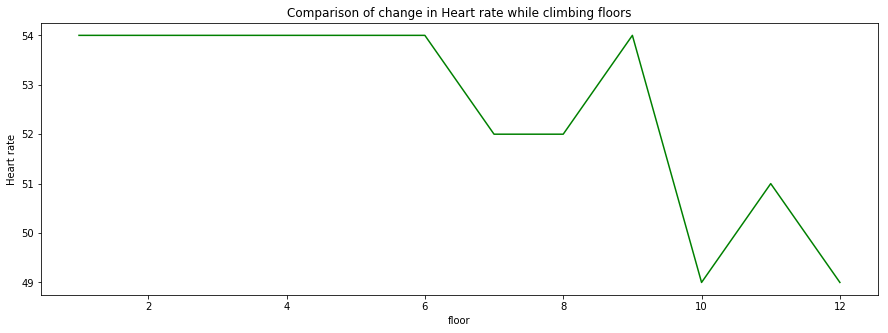

In [29]:
#Graph1:Comparison of change in heart rate while climbing floors
merged_data=merged_inner['heart_rate'].groupby(merged_inner['floor']).nunique()
plt.figure(figsize=(15,5))
plt.ylabel('Heart rate')
plt.title('Comparison of change in Heart rate while climbing floors')
merged_data.plot(kind='line',color='green')

In [22]:
#Conclusion: The above graph explains comparison of heart rate with floors climbed, there are total of 12 floors. the heart
#/ rate remains the same while climbing first 5 floors, and dips down while climbing 7th floor.The heart rate levels down 
#/ while climbing the 10th and 12th floor.

In [ ]:
# MERGE 2:ALL FILES

In [30]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
path = "C:\\Users\\user\\Desktop\\python project\\sumitha"
file_identifier = "*.csv"


In [36]:
combined_data = pd.DataFrame()
for f in glob.glob(path + "/*" + file_identifier):
    df = pd.read_csv(f)
    combined_data = combined_data.append(df,ignore_index=True)
    writer = pd.ExcelWriter('C:\\Users\\user\\Desktop\\python project\\sumitha\merged.xlsx', engine='xlsxwriter') 
    combined_data.to_excel(writer, sheet_name='Combined',) 
    writer.save()

In [37]:
combined_data

,Start;End;Sleep quality;Time in bed;Wake up;Sleep Notes;Heart rate;Activity (steps),Unnamed: 0,additional,altitude_gain,altitude_loss,binning_data,calorie,com.samsung.health.sleep.create_time,com.samsung.health.sleep.custom,com.samsung.health.sleep.datauuid,...,min_heart_rate,original_bed_time,original_efficiency,original_wake_up_time,pkg_name,quality,speed,start_time,time_offset,update_time
0,NaN,0.0,NaN,NaN,NaN,NaN,58.420000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,NaN,2018-04-07 17:26:10.149,UTC-0300,2018-04-07 17:41:42.416
1,NaN,1.0,NaN,NaN,NaN,NaN,252.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,NaN,2018-01-27 09:38:00.000,UTC-0400,2018-01-27 10:09:23.176
2,NaN,2.0,NaN,NaN,NaN,NaN,43.850000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,NaN,2018-05-01 18:01:24.059,UTC-0300,2018-05-01 18:13:21.374
3,NaN,3.0,NaN,NaN,NaN,NaN,166.074000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,NaN,2018-02-24 13:35:13.243,UTC-0400,2018-02-24 13:52:08.229
4,NaN,4.0,NaN,NaN,NaN,NaN,42.630000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,NaN,2018-03-16 17:15:20.192,UTC-0300,2018-03-16 17:26:39.581
5,NaN,5.0,NaN,NaN,NaN,NaN,66.030000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,NaN,2018-05-01 17:35:24.000,UTC-0300,2018-05-01 17:47:03.661
6,NaN,6.0,NaN,NaN,NaN,NaN,56.329998,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,NaN,2018-03-16 07:50:10.000,UTC-0300,2018-03-16 08:04:32.061
7,NaN,7.0,NaN,NaN,NaN,NaN,366.661000,NaN,NaN,NaN,...,79.0,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,NaN,2017-12-29 15:32:24.297,UTC-0700,2017-12-30 12:01:22.159
8,NaN,8.0,NaN,NaN,NaN,NaN,49.230000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,NaN,2018-02-28 07:53:46.739,UTC-0400,2018-02-28 08:05:02.244
9,NaN,9.0,NaN,NaN,NaN,NaN,76.540000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,NaN,2018-04-22 08:38:52.862,UTC-0300,2018-04-22 08:59:40.391


In [43]:
Workout_data = combined_data[['deviceuuid','start_time' , 'end_time' , 'calorie', 'distance']]

In [44]:
combined_data['start_time'] = combined_data['start_time'].astype('datetime64[ns]')
combined_data['end_time'] = combined_data['end_time'].astype('datetime64[ns]')

In [45]:
Workout_data.dtypes

deviceuuid            object
start_time    datetime64[ns]
end_time      datetime64[ns]
calorie              float64
distance             float64
dtype: object

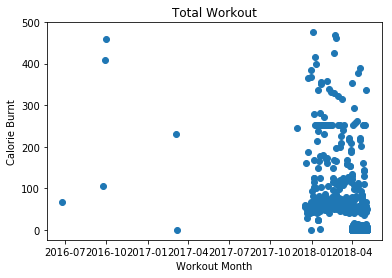

In [46]:
plt.title("Total Workout")
plt.xlabel("Workout Month")
plt.ylabel("Calorie Burnt")
plt.plot_date(Workout_data.start_time,Workout_data.calorie)

In [ ]:
# Conclusion: the above graph shows the calorie burnt approtimately for a month. In 2016 the calories burnt is relatively 
#/ less compared to year 2018.In the later part of 2017, there are no calories burnt for some months indicate the persons 
#/ sleeptime and proves no calories are burnt while sleeping.